In [302]:
import requests
from bs4 import BeautifulSoup
import nltk
import urllib.request 
import pickle

In [303]:
url='https://www.thehindu.com/news/national/chandrayaan-2-vikram-lander-located-on-lunar-surface-isro-chairman/article29367136.ece'
respnse=requests.get(url)
page=respnse.text
html=BeautifulSoup(page, 'html.parser')
span1=html.select('p')

In [305]:
a=[]
for i in span1:
    i=i.string
    a.append(i)
print(a)
text=str(a)

['\nThe last image of Vikram relayed at ISRO’s communication centre just before the agency announced that communication was lost with the lander. Photo: YouTube/ISRO Official\n\xa0 ', 'The Indian Space Research Organisation (ISRO) has retrieved images and located the lander Vikram on the moon on September 8 and is analysing them for a clear picture of the lander’s condition, it is learnt.', 'At 1.45 a.m. on September 7, 12 minutes into its descent onto the lunar surface, the lander lost contact with earth. It is believed to have deviated from its path, fallen silent, and probably crashed on moon. ', None, 'The pictures are among the early images sent later in the day by the main Chandrayaan 2 spacecraft, which continues to orbit the moon from pole to pole from a 100-km distance. The lander was spotted some distance away — possibly about half a kilometre — from its intended touchdown point, reports said.', 'The originally chosen region was about 70° south of the lunar equator and about 

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [307]:
#Sentence Tokenization
from nltk.tokenize import sent_tokenize
tokenized_text=sent_tokenize(text)
#print(tokenized_text)

["['\\nThe last image of Vikram relayed at ISRO’s communication centre just before the agency announced that communication was lost with the lander.", "Photo: YouTube/ISRO Official\\n\\xa0 ', 'The Indian Space Research Organisation (ISRO) has retrieved images and located the lander Vikram on the moon on September 8 and is analysing them for a clear picture of the lander’s condition, it is learnt.", "', 'At 1.45 a.m. on September 7, 12 minutes into its descent onto the lunar surface, the lander lost contact with earth.", 'It is believed to have deviated from its path, fallen silent, and probably crashed on moon.', "', None, 'The pictures are among the early images sent later in the day by the main Chandrayaan 2 spacecraft, which continues to orbit the moon from pole to pole from a 100-km distance.", 'The lander was spotted some distance away — possibly about half a kilometre — from its intended touchdown point, reports said.', "', 'The originally chosen region was about 70° south of the

In [308]:
text=pd.DataFrame()
text[['text']]=pd.DataFrame(tokenized_text)
text.head(6)

,text
0,['\nThe last image of Vikram relayed at ISRO’s...
1,"Photo: YouTube/ISRO Official\n\xa0 ', 'The Ind..."
2,"', 'At 1.45 a.m. on September 7, 12 minutes in..."
3,"It is believed to have deviated from its path,..."
4,"', None, 'The pictures are among the early ima..."
5,The lander was spotted some distance away — po...


In [309]:
#count Words
text['word_count'] = text['text'].apply(lambda x: len(str(x).split(" ")))
text[['text','word_count']].head()

,text,word_count
0,['\nThe last image of Vikram relayed at ISRO’s...,22
1,"Photo: YouTube/ISRO Official\n\xa0 ', 'The Ind...",39
2,"', 'At 1.45 a.m. on September 7, 12 minutes in...",22
3,"It is believed to have deviated from its path,...",16
4,"', None, 'The pictures are among the early ima...",34


In [310]:
#count characters
text['char_count'] = text['text'].str.len()
text[['text','char_count']].head()

,text,char_count
0,['\nThe last image of Vikram relayed at ISRO’s...,145
1,"Photo: YouTube/ISRO Official\n\xa0 ', 'The Ind...",245
2,"', 'At 1.45 a.m. on September 7, 12 minutes in...",120
3,"It is believed to have deviated from its path,...",91
4,"', None, 'The pictures are among the early ima...",185


In [311]:
#Average Word Length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))
text['avg_word'] = text['text'].apply(lambda x: avg_word(x))
text[['text','avg_word']].head()

,text,avg_word
0,['\nThe last image of Vikram relayed at ISRO’s...,5.636364
1,"Photo: YouTube/ISRO Official\n\xa0 ', 'The Ind...",5.307692
2,"', 'At 1.45 a.m. on September 7, 12 minutes in...",4.500000
3,"It is believed to have deviated from its path,...",4.750000
4,"', None, 'The pictures are among the early ima...",4.470588


In [312]:
#count of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

text['stopwords'] = text['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
text[['text','stopwords']].head()

,text,stopwords
0,['\nThe last image of Vikram relayed at ISRO’s...,9
1,"Photo: YouTube/ISRO Official\n\xa0 ', 'The Ind...",15
2,"', 'At 1.45 a.m. on September 7, 12 minutes in...",6
3,"It is believed to have deviated from its path,...",7
4,"', None, 'The pictures are among the early ima...",13


In [313]:
#Number of special characters
text['hastags'] = text['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
text[['text','hastags']].head()

,text,hastags
0,['\nThe last image of Vikram relayed at ISRO’s...,0
1,"Photo: YouTube/ISRO Official\n\xa0 ', 'The Ind...",0
2,"', 'At 1.45 a.m. on September 7, 12 minutes in...",0
3,"It is believed to have deviated from its path,...",0
4,"', None, 'The pictures are among the early ima...",0


In [314]:
#count of numerics
text['numerics'] = text['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
text[['text','numerics']].head()

,text,numerics
0,['\nThe last image of Vikram relayed at ISRO’s...,0
1,"Photo: YouTube/ISRO Official\n\xa0 ', 'The Ind...",1
2,"', 'At 1.45 a.m. on September 7, 12 minutes in...",1
3,"It is believed to have deviated from its path,...",0
4,"', None, 'The pictures are among the early ima...",1


In [315]:
#number of Uppercase words
text['upper'] = text['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
text[['text','upper']].head()

,text,upper
0,['\nThe last image of Vikram relayed at ISRO’s...,0
1,"Photo: YouTube/ISRO Official\n\xa0 ', 'The Ind...",1
2,"', 'At 1.45 a.m. on September 7, 12 minutes in...",0
3,"It is believed to have deviated from its path,...",0
4,"', None, 'The pictures are among the early ima...",0


In [316]:
#Basic Pre-processing
#making all as Lower case
text['text'] = text['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
text['text'].head()

0    ['\nthe last image of vikram relayed at isro’s...
1    photo: youtube/isro official\n\xa0 ', 'the ind...
2    ', 'at 1.45 a.m. on september 7, 12 minutes in...
3    it is believed to have deviated from its path,...
4    ', none, 'the pictures are among the early ima...
Name: text, dtype: object

In [317]:
#Removing Punctuation
text['text'] = text['text'].str.replace('[^\w\s]','')
text['text'].head()

0    nthe last image of vikram relayed at isros com...
1    photo youtubeisro officialnxa0  the indian spa...
2     at 145 am on september 7 12 minutes into its ...
3    it is believed to have deviated from its path ...
4     none the pictures are among the early images ...
Name: text, dtype: object

In [318]:
#Removal of Stop Words
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
text['text'].head()

0    nthe last image vikram relayed isros communica...
1    photo youtubeisro officialnxa0 indian space re...
2    145 september 7 12 minutes descent onto lunar ...
3    believed deviated path fallen silent probably ...
4    none pictures among early images sent later da...
Name: text, dtype: object

In [319]:
# tokenization and find the frequency

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
t=[]
for i in range(len(text['text'])):
    tokenized_text=sent_tokenize(text['text'][i])
    tokenized_word=word_tokenize(text['text'][i])
    t =t+tokenized_word
#print(t)
freq = pd.Series(' '.join(text['text']).split()).value_counts()[:10]
print(freq)
fdist = FreqDist(t)
print(fdist)

lander       9
none         7
said         6
isro         5
moon         5
less         4
vikram       4
lunar        4
images       4
september    4
dtype: int64
<FreqDist with 238 samples and 324 outcomes>


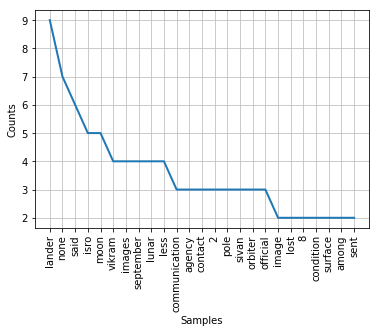

In [320]:
#plotting the frequency of words
fdist.plot(25,cumulative=False)
plt.show()

In [321]:
#Common word removal
freq = list(freq.index)
text['text'] = text['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
text['text'].head()

0    nthe last image relayed isros communication ce...
1    photo youtubeisro officialnxa0 indian space re...
2    145 7 12 minutes descent onto surface lost con...
3    believed deviated path fallen silent probably ...
4    pictures among early sent later day main chand...
Name: text, dtype: object

In [322]:
#Rare words removal
freq = pd.Series(' '.join(text['text']).split()).value_counts()[-10:]
freq.head()

high          1
experts       1
associated    1
research      1
path          1
dtype: int64

In [323]:
freq = list(freq.index)
text['text']= text['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
text['text'].head()

0    nthe last image relayed isros communication ce...
1    photo youtubeisro officialnxa0 indian space or...
2    145 7 12 minutes descent onto surface lost con...
3     believed deviated fallen silent probably crashed
4    pictures among early sent later day main chand...
Name: text, dtype: object

In [324]:
#Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
text['text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    nthe last imag relay isro commun centr agenc a...
1    photo youtubeisro officialnxa0 indian space or...
2    145 7 12 minut descent onto surfac lost contac...
3            believ deviat fallen silent probabl crash
4    pictur among earli sent later day main chandra...
Name: text, dtype: object

In [325]:
#Lemmatization
from textblob import Word
text['text'] =text['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
text['text'].head()

0    nthe last image relayed isros communication ce...
1    photo youtubeisro officialnxa0 indian space or...
2    145 7 12 minute descent onto surface lost cont...
3     believed deviated fallen silent probably crashed
4    picture among early sent later day main chandr...
Name: text, dtype: object

In [326]:
#POS Tagging
nltk.pos_tag(t)[0:5]

[('nthe', 'DT'),
 ('last', 'JJ'),
 ('image', 'NN'),
 ('vikram', 'VBD'),
 ('relayed', 'VBN')]

In [327]:
#Text Processing
#N-grams(2)
from textblob import TextBlob
TextBlob(text['text'][0]).ngrams(2)

[WordList(['nthe', 'last']),
 WordList(['last', 'image']),
 WordList(['image', 'relayed']),
 WordList(['relayed', 'isros']),
 WordList(['isros', 'communication']),
 WordList(['communication', 'centre']),
 WordList(['centre', 'agency']),
 WordList(['agency', 'announced']),
 WordList(['announced', 'communication']),
 WordList(['communication', 'lost'])]

In [328]:
#Term frequency
tf1 = (text['text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1.head()

,words,tf
0,8,1
1,indian,1
2,located,1
3,officialnxa0,1
4,picture,1


In [329]:
#Inverse Document Frequency
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(text.shape[0]/(len(text[text['text'].str.contains(word)])))
tf1.head()

,words,tf,idf
0,8,1,2.120264
1,indian,1,3.218876
2,located,1,2.525729
3,officialnxa0,1,3.218876
4,picture,1,2.525729


In [330]:
#Term Frequency – Inverse Document Frequency (TF-IDF)
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1.head()

,words,tf,idf,tfidf
0,8,1,2.120264,2.120264
1,indian,1,3.218876,3.218876
2,located,1,2.525729,2.525729
3,officialnxa0,1,3.218876,3.218876
4,picture,1,2.525729,2.525729


In [331]:
#making worldcloud
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'him', 'other', 'each', "mustn't", 'shouldn', 'and', 'had', 'if', "wouldn't", 'y', 't', 'his', 'are', 'this', 'd', 'while', 'do', 'did', 'can', "you're", 'were', 'under', "didn't", 'about', 'themselves', 'in', 'whom', "that'll", 'now', 'has', 'then', 'here', 'me', 'why', 'too', 'yourself', "needn't", 'once', 'further', 'my', 'her', "she's", 'between', "should've", 'she', 'won', "you've", 'just', 'any', 'only', 'i', 'was', 'but', 'both', 'some', 'shan', "couldn't", 'of', 'didn', 'does', 'they', 'nor', 'himself', 'myself', 'weren', 'against', "won't", 'because', 'is', 'up', 'than', 's', "hadn't", 'few', 'such', 'itself', 'until', 'through', 'an', 'ain', 'with', 'isn', 'where', 'at', 'that', 'you', 'doesn', 'mightn', 've', "doesn't", "haven't", 'for', 'have', 'am', 'over', 'more', 'very', 'having', 'o', "don't", 'wouldn', 'hadn', 'it', "isn't", 'ma', 'needn', 'don', 'mustn', 'he', 'their', 'should', 'theirs', 'll', 'aren', 'ourselves', 'ours', 'haven', 'below', 'down', 'out', 'there', 'a

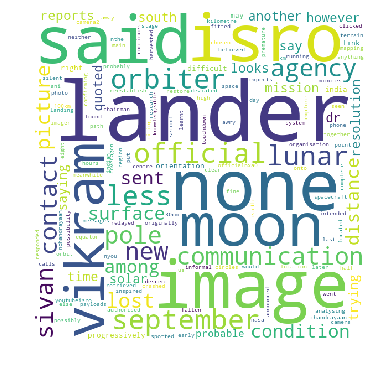

In [332]:
comment_words = ' '
for words in t: 
    comment_words = comment_words + words + ' '
    
wordcloud = WordCloud(width = 600, height = 600, 
                background_color='white' , 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

In [333]:
text.head()

,text,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,nthe last image relayed isros communication ce...,22,145,5.636364,9,0,0,0
1,photo youtubeisro officialnxa0 indian space or...,39,245,5.307692,15,0,1,1
2,145 7 12 minute descent onto surface lost cont...,22,120,4.500000,6,0,1,0
3,believed deviated fallen silent probably crashed,16,91,4.750000,7,0,0,0
4,picture among early sent later day main chandr...,34,185,4.470588,13,0,1,0


In [351]:
from textblob import TextBlob

In [358]:
text['text'][0]

'nthe last image relayed isros communication centre agency announced communication lost'

In [361]:
for i in range(len(text['text'])):
    se=TextBlob(text['text'][i])
    print(se.sentiment)

Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=0.10000000000000002, subjectivity=0.3833333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.08888888888888889, subjectivity=0.2111111111111111)
Sentiment(polarity=-0.16666666666666666, subjectivity=0.16666666666666666)
Sentiment(polarity=0.375, subjectivity=0.75)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4166666666666667, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.2, subjectivity=0.05)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)
Sentiment(polarity=0.09523809523809523, 